In [1]:
import pandas as pd
 
# The selected 4 Venues are Ylläs, Himos, Serena and Ruka
train_venues = [
    "https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/refs/heads/main/Final_data_scripts/Data/Yllas_final.csv",
    "https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/refs/heads/main/Final_data_scripts/Data/Himos_final.csv",
    "https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/refs/heads/main/Final_data_scripts/Data/Serena_final.csv",
    "https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/refs/heads/main/Final_data_scripts/Data/Ruka_final.csv"
]
train_dfs = [pd.read_csv(f) for f in train_venues]
df_train = pd.concat(train_dfs, ignore_index=True)
 
# The selected Venue for testing is Tahko
test_venue = "https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/refs/heads/main/Final_data_scripts/Data/Tahko_final.csv"
df_test = pd.read_csv(test_venue)
 
df_train.shape, df_test.shape

((29587, 8), (7305, 8))

In [2]:
print(df_train.isna().sum())

df_train.ffill(inplace = True)

print(df_train.isna().sum())

Date                                    0
Precipitation amount [mm]              27
Snow depth [cm]                       135
Average temperature [°C]                5
cloud_cover_code                        4
Direct solar radiation mean [W/m2]    718
days_above_10cm                         0
days_above_20cm                         0
dtype: int64
Date                                  0
Precipitation amount [mm]             0
Snow depth [cm]                       0
Average temperature [°C]              0
cloud_cover_code                      0
Direct solar radiation mean [W/m2]    0
days_above_10cm                       0
days_above_20cm                       0
dtype: int64


In [3]:
print(df_test.isna().sum())

df_test.ffill(inplace = True)

print(df_test.isna().sum())

Date                                    0
cloud_cover_code                        1
Precipitation amount [mm]              22
Snow depth [cm]                         1
Average temperature [°C]               22
Direct solar radiation mean [W/m2]    179
days_above_10cm                         0
days_above_20cm                         0
dtype: int64
Date                                  0
cloud_cover_code                      0
Precipitation amount [mm]             0
Snow depth [cm]                       0
Average temperature [°C]              0
Direct solar radiation mean [W/m2]    0
days_above_10cm                       0
days_above_20cm                       0
dtype: int64


In [5]:
# Linear Regression Model

features = ["Precipitation amount [mm]", "Average temperature [°C]", "cloud_cover_code", "Direct solar radiation mean [W/m2]"]
X_train, y_train = df_train[features], df_train["Snow depth [cm]"]
X_test, y_test = df_test[features], df_test["Snow depth [cm]"]

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, r2_score

new_model = LinearRegression()

new_model.fit(X_train, y_train)

y_pred = new_model.predict(X_test)

new_mae = mean_absolute_error(y_test, y_pred)
new_r2 = r2_score(y_test, y_pred)
print(f"MAE: {new_mae}")
print(f"R²: {new_r2}")

MAE: 12.19804952971378
R²: 0.3925303653001907


In [4]:
features = ["Precipitation amount [mm]", "Average temperature [°C]", "cloud_cover_code", "Direct solar radiation mean [W/m2]"]
X_train, y_train = df_train[features], df_train["Snow depth [cm]"]
X_test, y_test = df_test[features], df_test["Snow depth [cm]"]

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error, r2_score
 
# Polynomial Model
poly_degree = 3
model = make_pipeline(PolynomialFeatures(poly_degree), LinearRegression())
 
model.fit(X_train, y_train)
 
y_pred = model.predict(X_test)
 
# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"R²: {r2}")

MAE: 10.536765826234115
R²: 0.4546694207494334


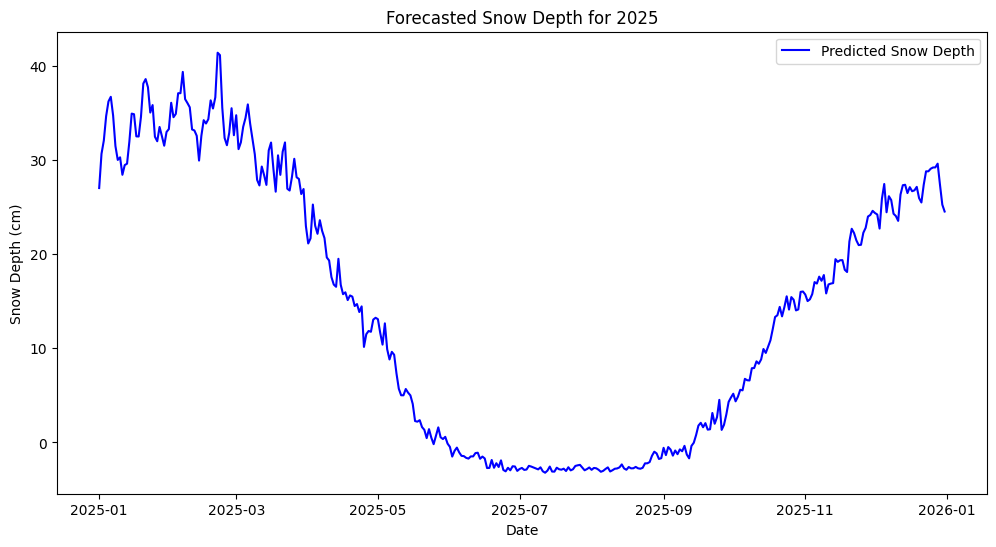

          Date  Predicted Snow Depth [cm]
0   2025-01-01                  27.039461
1   2025-01-02                  30.677755
2   2025-01-03                  32.089486
3   2025-01-04                  34.686357
4   2025-01-05                  36.244523
..         ...                        ...
360 2025-12-27                  29.234031
361 2025-12-28                  29.631154
362 2025-12-29                  27.385252
363 2025-12-30                  25.273487
364 2025-12-31                  24.544951

[365 rows x 2 columns]


In [11]:
import matplotlib.pyplot as plt


df_train["Date"] = pd.to_datetime(df_train["Date"])
future_dates = pd.date_range(start="2025-01-01", periods=365, freq="D")

# Estimate seasonal variations using past data
seasonal_means = df_train.groupby(df_train["Date"].dt.dayofyear)[features].mean().reset_index(drop=True)

# Ensure future_X has exactly 365 rows by repeating seasonal means if needed
if len(seasonal_means) < 365:
    seasonal_means = seasonal_means.reindex(range(365), method="nearest")

# Create future feature set
future_X = pd.DataFrame(seasonal_means.iloc[:365].values, columns=features)

# Predict future snow depth
future_snow_depth = model.predict(future_X)

# Create DataFrame with predictions
future_df = pd.DataFrame({"Date": future_dates, "Predicted Snow Depth [cm]": future_snow_depth})

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(future_df["Date"], future_df["Predicted Snow Depth [cm]"], label="Predicted Snow Depth", color="blue")
plt.xlabel("Date")
plt.ylabel("Snow Depth (cm)")
plt.title("Forecasted Snow Depth for 2025")
plt.legend()
plt.show()

# Display the forecasted DataFrame
print(future_df)


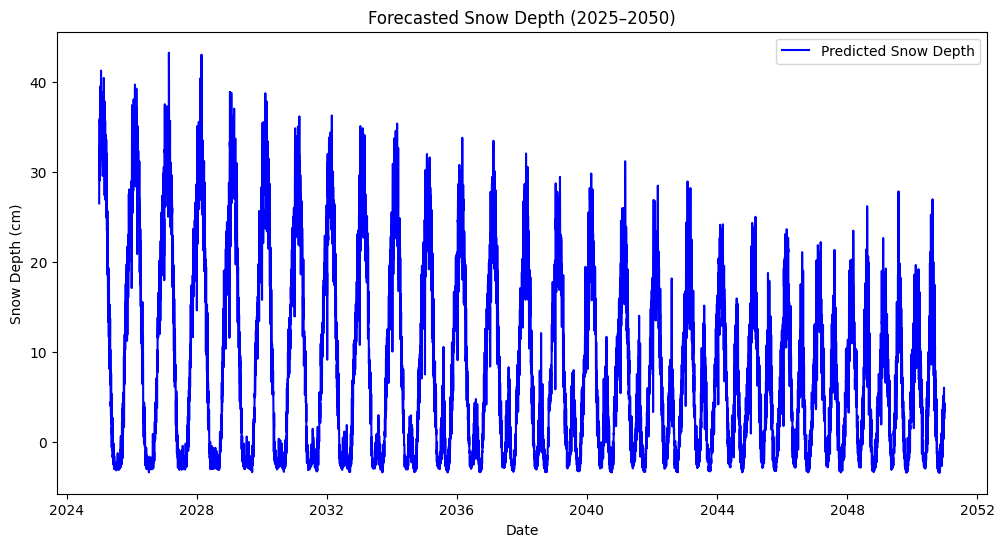

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

df_train["Date"] = pd.to_datetime(df_train["Date"])

future_dates = pd.date_range(start="2025-01-01", end="2050-12-31", freq="D")

seasonal_means = df_train.groupby(df_train["Date"].dt.dayofyear)[features].mean()

num_years = (2050 - 2025) + 1
num_days = len(future_dates)

seasonal_data_repeated = np.tile(seasonal_means.values, (num_years, 1))
future_X = pd.DataFrame(seasonal_data_repeated[:num_days], columns=features)

# Future long-term trend: +10°C by 2050 and more extreme values sometimes
temperature_trend = np.linspace(0, 11, num_days)
random_variation = np.random.normal(0, 1, num_days)

future_X["Average temperature [°C]"] += temperature_trend + random_variation



future_snow_depth = model.predict(future_X)


future_df = pd.DataFrame({"Date": future_dates, "Predicted Snow Depth [cm]": future_snow_depth})
plt.figure(figsize=(12, 6))
plt.plot(future_df["Date"], future_df["Predicted Snow Depth [cm]"], label="Predicted Snow Depth", color="blue")
plt.xlabel("Date")
plt.ylabel("Snow Depth (cm)")
plt.title("Forecasted Snow Depth (2025–2050)")
plt.legend()

future_df.to_csv('../Data/forecast_prediction.csv')

In [36]:
features = ["Average temperature [°C]"]
X_train, y_train = df_train[features], df_train["Snow depth [cm]"]
X_test, y_test = df_test[features], df_test["Snow depth [cm]"]

# Polynomial Model
poly_degree = 9
model = make_pipeline(PolynomialFeatures(poly_degree), LinearRegression())
 
model.fit(X_train, y_train)
 
y_pred = model.predict(X_test)
 
# Evaluate performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"R²: {r2}")

MAE: 12.295538823552151
R²: 0.34175089053642205


In [7]:
import joblib
 
joblib.dump(model, "polynomial_regression_snow_model.pkl")
 
weather_model = joblib.load("polynomial_regression_snow_model.pkl")

In [8]:
remaining_venues = [
    "https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/main/Final_data_scripts/Data/Lahti_final.csv",
    "https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/main/Final_data_scripts/Data/Vuokatti_final.csv",
    "https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/main/Final_data_scripts/Data/Mustavaara_final.csv",
    "https://raw.githubusercontent.com/ZetaGroup1/WeatherMachine/main/Final_data_scripts/Data/Pyhatunturi_final.csv"
]

remaining_df = [pd.read_csv(f) for f in remaining_venues]
df_remaining = pd.concat(remaining_df, ignore_index=True)
 
df_remaining.ffill(inplace=True)
df_remaining.bfill(inplace=True)


 
# Predict snow depth for these Venues
df_remaining["Predicted Snow Depth [cm]"] = weather_model.predict(df_remaining[features])

df_remaining.to_csv("predicted_snow_conditions.csv", index=False)
df_remaining.sample(10)

,Date,cloud_cover_code,Precipitation amount [mm],Snow depth [cm],Average temperature [°C],Direct solar radiation mean [W/m2],days_above_10cm,days_above_20cm,Predicted Snow Depth [cm]
15766,2008-03-03,0.0,3.0,50.0,-10.6,11.0,44,41,32.820956
13603,2022-04-01,0.0,-1.0,53.0,-8.1,10.4,126,122,26.300615
23820,2010-03-19,0.0,3.6,77.0,-13.8,252.1,132,117,60.199618
6120,2021-10-05,7.0,7.2,-1.0,9.6,1.4,0,0,0.462647
8146,2007-04-23,0.0,2.7,-1.0,3.9,1.0,0,0,6.163019
17476,2012-11-06,8.0,7.4,3.0,-0.3,1.7,0,0,19.215702
25013,2013-06-24,7.0,0.0,-1.0,19.7,185.9,0,0,-1.934246
3853,2015-07-22,8.0,15.7,-1.0,13.8,209.0,0,0,-2.812712
10824,2014-08-22,2.0,-1.0,-1.0,12.4,2.1,0,0,-3.899037
27274,2019-09-01,7.0,-1.0,-1.0,14.8,318.0,0,0,-1.727803


In [9]:
df_remaining.isna().sum()

Date                                  0
cloud_cover_code                      0
Precipitation amount [mm]             0
Snow depth [cm]                       0
Average temperature [°C]              0
Direct solar radiation mean [W/m2]    0
days_above_10cm                       0
days_above_20cm                       0
Predicted Snow Depth [cm]             0
dtype: int64

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142,
  143,
  144,
  145,
  146,
  147,
  148,
  149,
  150,
  151,
  152,
  153,
  154,
  155,
  156,
  157,
  15

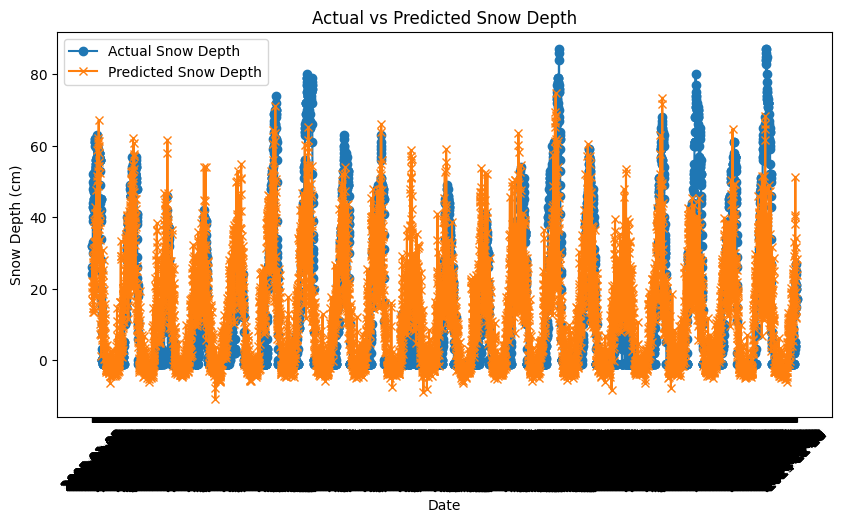

In [10]:
import matplotlib.pyplot as plt
 
# Plot actual vs predicted snow depth
plt.figure(figsize=(10, 5))
plt.plot(df_test["Date"], y_test, label="Actual Snow Depth", marker='o')
plt.plot(df_test["Date"], y_pred, label="Predicted Snow Depth", marker='x')
 
plt.xlabel("Date")
plt.ylabel("Snow Depth (cm)")
plt.title("Actual vs Predicted Snow Depth")
plt.legend()
plt.xticks(rotation=45)

In [15]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import math
 
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
 
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse:}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 9.193027143834945
Mean Squared Error (MSE): 243.52218996697982
Root Mean Squared Error (RMSE): 15.605197530533852
R² Score: 0.4386243143704852


In [12]:
df_test["Prediction Error"] = abs(y_test - y_pred)
df_test_sorted = df_test.sort_values("Prediction Error", ascending=False)
 
print(df_test_sorted[["Date", "Snow depth [cm]", "Prediction Error"]].head(10))
print(df_test_sorted[["Date", "Snow depth [cm]", "Prediction Error"]].tail(10))

            Date  Snow depth [cm]  Prediction Error
4841  2018-04-05             84.0         72.336748
6993  2024-02-25             85.0         72.150908
6991  2024-02-23             85.0         70.498069
6990  2024-02-22             87.0         69.722229
6992  2024-02-24             80.0         65.661413
6994  2024-02-26             78.0         65.344190
2281  2011-04-02             76.0         65.036143
4842  2018-04-06             75.0         64.198215
6988  2024-02-20             84.0         63.711868
2280  2011-04-01             77.0         62.692152
            Date  Snow depth [cm]  Prediction Error
6703  2023-05-11             -1.0          0.012098
5367  2019-09-13             -1.0          0.011916
2685  2012-05-10             -1.0          0.009639
6018  2021-06-25             -1.0          0.008329
2049  2010-08-13             -1.0          0.008201
3801  2015-05-31             -1.0          0.006677
1717  2009-09-15             -1.0          0.006474
7222  2024-1

Text(0.5, 1.0, 'Distribution of Prediction Errors')

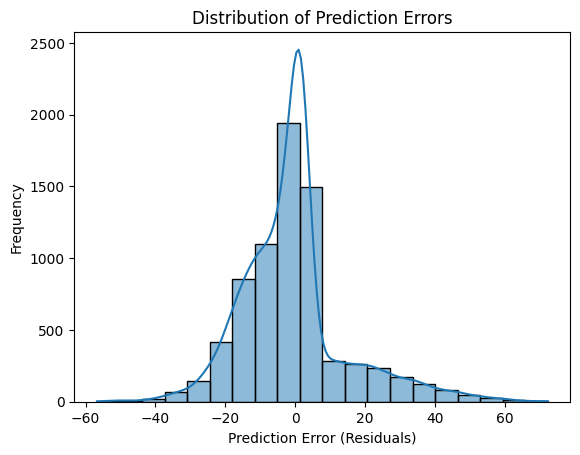

In [13]:
import seaborn as sns
 
residuals = y_test - y_pred  # Difference between actual and predicted

sns.histplot(residuals, bins=20, kde=True)

plt.xlabel("Prediction Error (Residuals)")

plt.ylabel("Frequency")

plt.title("Distribution of Prediction Errors")
 

In [ ]:
# Random Forest Regression Model (actually, less effective than the Polynomial)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

features = ["Precipitation amount [mm]", "Average temperature [°C]", "cloud_cover_code", "Direct solar radiation mean [W/m2]"]
X_train, y_train = df_train[features], df_train["Snow depth [cm]"]
X_test, y_test = df_test[features], df_test["Snow depth [cm]"]
 
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
 
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MAE: {mae}")
print(f"R²: {r2}")

MAE: 9.193027143834945
R²: 0.4386243143704852
